# Analysis notebook: `test` 

## Define analysis name

In [1]:
ana_name = "test"

## Preamble

In [2]:
from preamble import *

# Load data

In [3]:
!ls ../../output/results/test

cut_flow.csv  efficiency.csv  hists.h5	results.pkl  test.log  test.yaml


In [4]:
loader = Load(
    in_path = f"../../output/results/{ana_name}"
)

[Load] ✅ Initialised with out_path=../../output/results/test


In [5]:
results_from_persistent = loader.load_array_parquet()

[Load] ⚠️ File not found: ../../output/results/test/events.parquet


In [6]:
results = loader.load_pkl() 
results_from_persistent = loader.load_all() # Persistent backup 

[Load] ✅ Successfully loaded results from ../../output/results/test/results.pkl
[Load] ✅ Loaded cut stats from ../../output/results/test/cut_flow.csv
[Load] ✅ Loaded histograms from ../../output/results/test/hists.h5
[Load] ✅ Loaded efficiency info from ../../output/results/test/efficiency.csv
[Load] ⚠️ File not found: ../../output/results/test/events.parquet
[Load] ⚠️ File not found: ../../output/results/test/info.txt


## Analyse results

### Cut flow

In [7]:
display(results["cut_flow"])

,Cut,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,6932,100.000000,100.000000,No selection applied
1,is_reco_electron,6442,92.931333,92.931333,Electron track fits
2,has_trk_front,6336,91.402193,98.354548,Tracks intersect tracker entrance
3,good_trkqual,1187,17.123485,18.734217,Track fit quality > 0.8
4,is_downstream,804,11.598384,67.733783,Downstream tracks (p_z > 0 at tracker entrance)
5,has_hits,802,11.569533,99.751244,>20 active tracker hits
6,within_d0,165,2.380265,20.573566,Distance of closest approach (d_0 < 100 mm)
7,within_pitch_angle,93,1.341604,56.363636,Extrapolated pitch angle (0.557735 < tan(theta...
8,within_lhr_max,74,1.067513,79.569892,Loop helix maximum radius (450 < R_max < 680 mm)
9,is_truth_electron,43,0.620312,58.108108,Track parents are electrons (truth PID)


### Histograms

In [8]:
draw = Draw()

# Define image directory
img_dir = f"../../output/images/{ana_name}"
os.makedirs(img_dir, exist_ok=True)

[Plot] ⭐️ Initialised


[Plot] ✅ 	Wrote ../../output/images/test/h1o_1x3_mom_windows.png


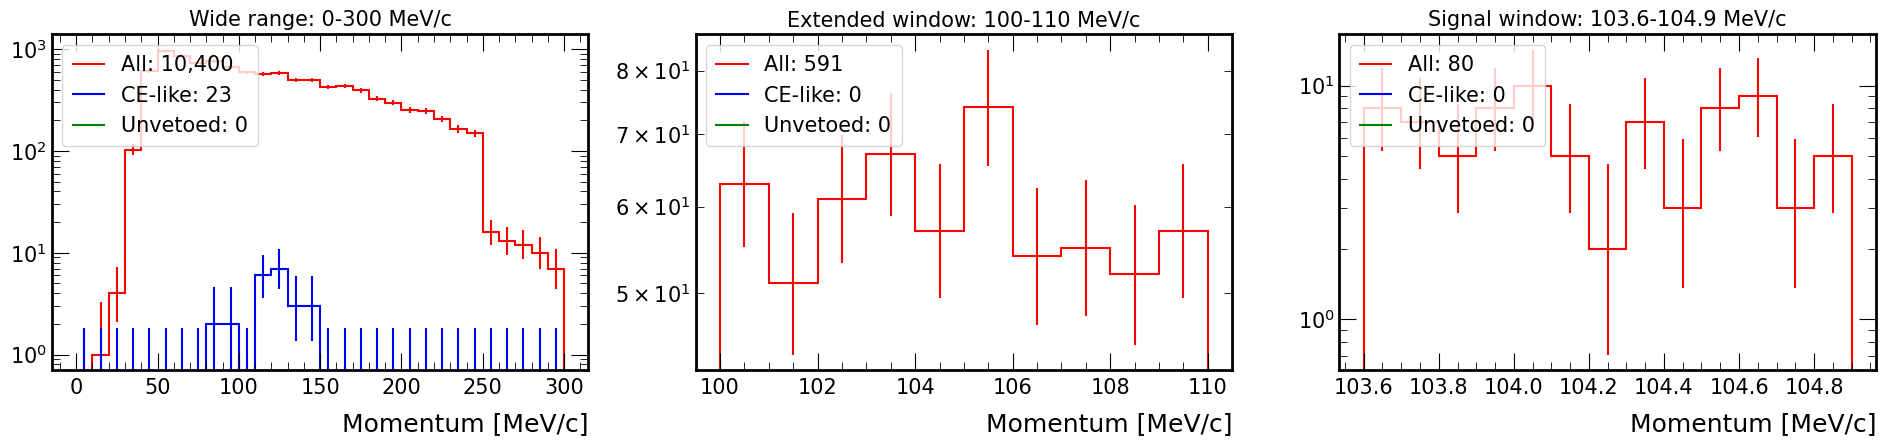

In [9]:
draw.plot_mom_windows(results["hists"], out_path=f"{img_dir}/h1o_1x3_mom_windows.png") 

[Plot] ✅ 	Wrote ../../output/images/test/h1o_crv_zwindows.png


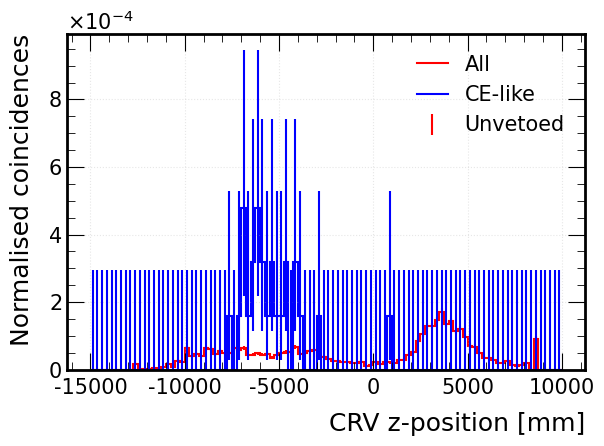

In [10]:
draw.plot_crv_z(results["hists"], out_path=f"{img_dir}/h1o_crv_zwindows.png") 

### Efficiency 

In [11]:
display(results["efficiency"])

,Type,Events Passing (k),Total Events (N),Efficiency [%],Efficiency Error [%]
0,Signal (wide),23,4926,0.47,0.10
1,Signal (ext),0,4926,0.00,0.00
2,Signal (sig),0,4926,0.00,0.00
3,Veto (wide),0,23,100.00,2.08
4,Veto (ext),0,0,0.00,NaN
5,Veto (sig),0,0,0.00,NaN


### Background event info

In [12]:
print(results["event_info"])

In [13]:
printer = Print()
printer.print_n_events(results["events"])

[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[pyprint] ⭐️ Printing 1 event(s)...

